In [1]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import defaultdict
from itertools import combinations
from nltk.probability import FreqDist
import math

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/oa6121/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/oa6121/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# 1. Download a decently sized corpus (between 500,000 and 2 million words) from Gutenberg.
# 2. Using regular expressions or other methods, write a function to remove any 
# extraneous stuff from the text (start/end text from Gutenberg).
def remove_extraneous(text):
    # Define the start and end patterns often found in Gutenberg texts
    start_pattern = r"\*\*\* START OF (THE|THIS) PROJECT GUTENBERG EBOOK .* \*\*\*"
    end_pattern = r"\*\*\* END OF (THE|THIS) PROJECT GUTENBERG EBOOK .* \*\*\*"
    
    # identify the start of the content
    start_match = re.search(start_pattern, text, re.IGNORECASE)
    if start_match:
        text = text[start_match.end():]  # Trim everything before the start match
    
    # identify the end of the content
    end_match = re.search(end_pattern, text, re.IGNORECASE)
    if end_match:
        text = text[:end_match.start()]  # Trim everything after the end match
    
    # Return the cleaned text
    return text.strip()


import string

# function to remove all punctuations
def remove_punctuation(text):
    # Create a translation table to remove punctuation
    return text.translate(str.maketrans('', '', string.punctuation))


# Function to read text file
def read_text_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            return text
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")


# Function to print out some text: accept the text and length to pprint
def print_out_some_text(text, length_to_print):
    if text:
        print(text[:length_to_print])  # Print first 500 characters for preview

# Function to read text file
def read_text_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            return text
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")


# Function to print out some text: accept the text and length to pprint
def print_out_some_text(text, length_to_print):
    if text:
        print(text[:length_to_print])  # Print first 500 characters for preview
        
        
# Analyze the text with PMI
# 3. Read in the text, then tokenize and lowercase it 
# (e.g., use nltk.word_tokenize and string functions.
def text_tokenize_and_lowercase(text):

    text = remove_punctuation(text)     #Remove punctuations
    # Tokenize the text 
    # Note: Since the instruction is not given, stop-words are not removed. 
    tokens = word_tokenize(text)
    
    # Convert each token to lowercase
    tokens_lowercase = [token.lower() for token in tokens]
    
    return tokens_lowercase


# 4. Computation of unigram frequencies of the text. 
def calculate_unigram_freq(t):    
    # Calculate unigram frequencies
    freq_dist = FreqDist(t)
    
    return freq_dist



# # Print the frequencies of unigrams
# for word, freq in freqDist.items():
#     print(f'{word}: {freq}')

In [3]:
# 5. Count 2-word adjacent and non-adjacent collocations in each sentence in your text
# using a 4-word sliding window and considering all pairs of words in the window.
def count_collocations_with_sliding_window(text):
    # Initialize dictionaries to store counts for adjacent and non-adjacent collocations
    adjacent_collocations = defaultdict(int)
    non_adjacent_collocations = defaultdict(int)
    text = remove_punctuation(text)     #Remove punctuations
    # first tokenize the text into sentences
    sentences = sent_tokenize(text)
    for sentence in sentences:
        # secondly tokenize and lowercase each sentence
        tokens = word_tokenize(sentence.lower())
        
        # Iterate over the sentence with a 4-word sliding window
        for i in range(len(tokens) - 3):
            window = tokens[i:i + 4]  # Get 4-word sliding window
            # print("window", window)
            # Get all 2-word within the window (combinations of words)
            word_pairs = list(combinations(window, 2))
            for pair in word_pairs:
                # If the words are adjacent, count as adjacent collocation
                if abs(tokens.index(pair[0]) - tokens.index(pair[1])) == 1:
                    adjacent_collocations[pair] += 1
                # If the words are non-adjacent, count as non-adjacent collocation
                else:
                    non_adjacent_collocations[pair] += 1
    
    return adjacent_collocations, non_adjacent_collocations 


# 6. Filter out the collocations that contain a stop word. You may use NLTK’s stop list:
# from nltk.corpus import stopwords
# stoplist = stopwords.words('english')
# You are recommended to append to the stoplist to cover most English function words.
# Tell us which words you added in your report. ['would', 'could', 'might', 'must', 'also', 'yet']
# The function also output unigrams Count to be used as the number of collocations.
def count_collocations_and_stopword_filtered(text):
    # Remove punctuation from the text
    # text = remove_punctuation(text)
    
    # Get the default stopword list and add more common English function words
    stoplist = stopwords.words('english')
    additional_stopwords = ['would', 'could', 'might', 'must', 'also', 'yet', '“', '”', '’', '‘' ]
    stoplist.extend(additional_stopwords)
    
    # Initialize dictionaries to store counts for adjacent and non-adjacent collocations
    adjacent_collocations = defaultdict(int)
    non_adjacent_collocations = defaultdict(int)
    
    # Initialize a  unigrams counter, 
    unigram_counts = defaultdict(int)
    text = remove_punctuation(text)     #Remove punctuations
    # Tokenize the text into sentences
    sentences = sent_tokenize(text)
    
    for sentence in sentences:
        # Tokenize and lowercase each sentence
        tokens = word_tokenize(sentence.lower())
        
        # Count unigrams to be used as the number of collocations.
        for token in tokens:
            if token not in stoplist:
                unigram_counts[token] += 1
        
        # Iterate over the sentence with a 4-word sliding window
        for i in range(len(tokens) - 3):
            window = tokens[i:i + 4]  # Get 4-word sliding window
            
            # Get all pairs within the window (combinations of words)
            word_pairs = list(combinations(window, 2))
            
            for pair in word_pairs:
                # Filter out pairs that contain any stopword
                if pair[0] in stoplist or pair[1] in stoplist:
                    continue  # Skip this pair if either word is a stop word
                
                # If the words are adjacent, count as adjacent collocation
                if abs(tokens.index(pair[0]) - tokens.index(pair[1])) == 1:
                    adjacent_collocations[pair] += 1
                # If the words are non-adjacent, count as non-adjacent collocation
                else:
                    non_adjacent_collocations[pair] += 1
    
    return unigram_counts, adjacent_collocations, non_adjacent_collocations



# 7. Calculate the pointwise mutual information (PMI) of every collocation with count
# greater than 2 with the following equation, which can be derived if assuming that
# the number of unigrams (N in the equation below) is approximately equal to the
# number of collocations.
def pointwise_mutual_information_computation(unigram_counts, collocations, total_unigrams):
    # Dictionary to store PMI values
    pmi_scores = {}
    
    # Iterate through collocations and compute PMI for those with count > 2
    for pair, count in collocations.items():
        if count > 2:

            # PMI(w1, w2) = log2(N(count(w1, w2) / (count(w1) * count(w2))))
            count_w1_w2 = count                     # Get a joint counts of w1 & w2 from collocation
            count_w1 = unigram_counts[pair[0]]      # count(w1)
            count_w2 = unigram_counts[pair[1]]      # count(w2)

            # Calculate PMI
            pmi = math.log(total_unigrams * (count_w1_w2 / (count_w1 * count_w2)), 2)  # PMI with count and log base 2
            
            # Store the PMI score
            pmi_scores[pair] = pmi
    
    return pmi_scores


In [4]:
# Performance estimate of collocations
def performance_of_collocations_by_pmi(pmi_scores, n=5):
    # Sort PMI scores in descending order for best and ascending order for worst
    sorted_pmi = sorted(pmi_scores.items(), key=lambda x: x[1], reverse=True)
    
    # Top 5 good collocations (highest PMI)
    good_collocations = sorted_pmi[:n]
    
    # Bottom 5 not-so-good collocations (lowest PMI)
    poor_collocations = sorted_pmi[-n:]
    
    return good_collocations, poor_collocations


In [5]:
# Read text GUTENBERG text file
file_path = 'the_replic_by_plato.txt'
text_content = read_text_file(file_path)

In [6]:
# remove extraneous stuff
text_content_after_remove_extraneous = remove_extraneous(text_content)
# print_out_some_text(text_content_after_remove_extraneous, 200)  #print the first 200 words

In [9]:
#call tokenization function
tokens = text_tokenize_and_lowercase(text_content_after_remove_extraneous)
# print_out_some_text(tokens, 50)

In [10]:
freqDist = calculate_unigram_freq(tokens)

In [11]:
adjacent, non_adjacent = count_collocations_with_sliding_window(text_content_after_remove_extraneous)

In [12]:
ngram_count, adjacent, non_adjacent = count_collocations_and_stopword_filtered(text_content_after_remove_extraneous)

In [13]:
# Step 1: Count unigrams and collocations
unigram_counts, adjacent_collocations, non_adjacent_collocations = count_collocations_and_stopword_filtered(text_content_after_remove_extraneous)


In [14]:
# Step 2: Compute total unigrams
total_unigrams = sum(unigram_counts.values())

# Step 3: Compute PMI for adjacent collocations (with count > 2)
pmi_scores_adjacent = pointwise_mutual_information_computation(unigram_counts, adjacent_collocations, total_unigrams)
pmi_scores_non_adjacent = pointwise_mutual_information_computation(unigram_counts, non_adjacent_collocations, total_unigrams)


In [15]:
good_collocations_adj, poor_collocations_adj = performance_of_collocations_by_pmi(pmi_scores_adjacent, n=5)
good_collocations_non_adj, poor_collocations_non_adj = performance_of_collocations_by_pmi(pmi_scores_non_adjacent, n=5)

In [16]:
# print("5 good adjacent collocations identified using PMI: ", good_collocations)
# print("5 poor adjacent collocations identified using PMI: ", poor_collocations)
print("Performance of Adjacent collocations")
print("5 good adjacent collocations identified using PMI:")
for pair in good_collocations_adj:
    print(pair[0], " : ", pair[1])
print("\n")
print("5 poor adjacent collocations identified using PMI:")
for pair in poor_collocations_adj:
    print(pair[0], " : ", pair[1])

Performance of Adjacent collocations
5 good adjacent collocations identified using PMI:
('ebook', '150')  :  18.075562713740748
('cratyl', '435')  :  18.075562713740748
('435', '436')  :  18.075562713740748
('elenchi', '33')  :  18.075562713740748
('polemarchus—then', 'caricatured')  :  18.075562713740748


5 poor adjacent collocations identified using PMI:
('great', 'forms')  :  4.075914977212378
('two', 'philosophers')  :  3.954272040285295
('good', 'order')  :  3.5351319250597713
('injustice', 'shall')  :  2.862230622188364
('one', 'age')  :  2.8011891107861833


In [17]:
# print("5 good adjacent collocations identified using PMI: ", good_collocations)
# print("5 poor adjacent collocations identified using PMI: ", poor_collocations)
print("Performance of Non-adjacent collocations")
print("5 good non-adjacent collocations identified using PMI:")
for pair in good_collocations_non_adj:
    print(pair[0], " : ", pair[1])
print("\n")
print("5 poor non-adjacent collocations identified using PMI:")
for pair in poor_collocations_non_adj:
    print(pair[0], " : ", pair[1])

Performance of Non-adjacent collocations
5 good non-adjacent collocations identified using PMI:
('jowett', 'ebook')  :  17.075562713740748
('698', 'ff')  :  17.075562713740748
('symp', '193')  :  17.075562713740748
('exceptional', 'cases—what')  :  17.075562713740748
('attic', 'confections')  :  17.075562713740748


5 poor non-adjacent collocations identified using PMI:
('said', 'like')  :  -0.9464040540939502
('said', 'good')  :  -0.9954648725448363
('one', 'said')  :  -1.155514055211267
('one', 'state')  :  -1.1819862665724579
('said', 'state')  :  -1.4621865271126113


In [25]:
def process_data_for_vis(collocations):
    
    data = {
    'Collocation': [' '.join(pair) for pair, _ in collocations],
    'PMI Score': [score for _, score in collocations]
}
    return data

def plot_visualization(data, color):
    # Create a DataFrame
    df = pd.DataFrame(data)
    # Sort the DataFrame by PMI Score
    df = df.sort_values(by='PMI Score', ascending=True)

    # Plotting a scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df['PMI Score'], df['Collocation'], color=color, s=100)

    # Adding labels and title
    plt.xlabel('PMI Score')
    plt.ylabel('Collocation')
    plt.title('Top 5 Adjacent Collocations by PMI Score')

    # Show plot
    plt.show()

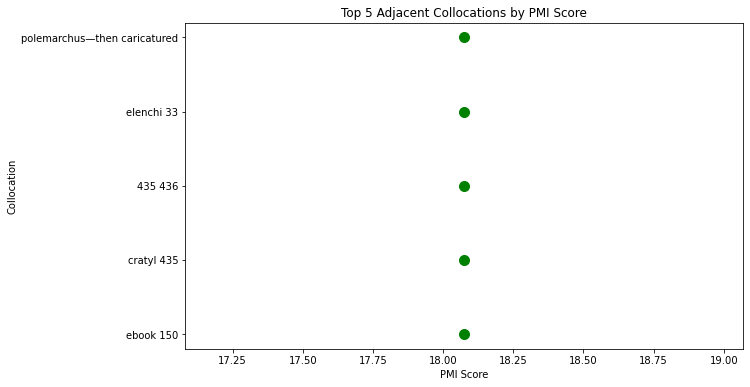

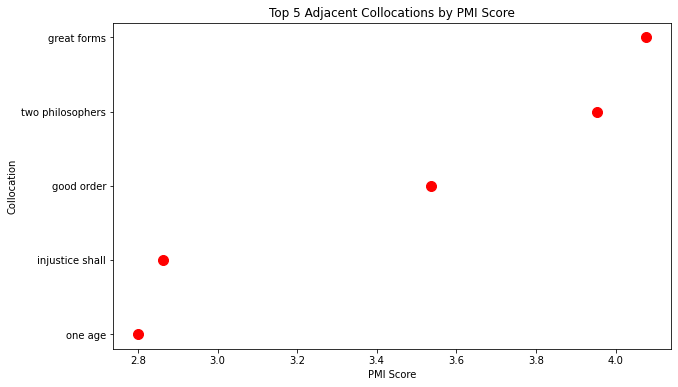

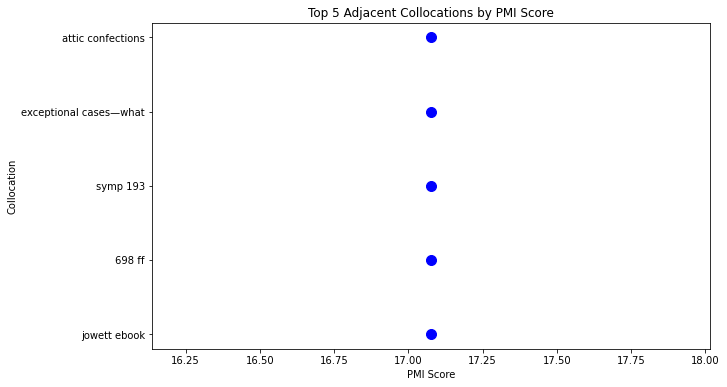

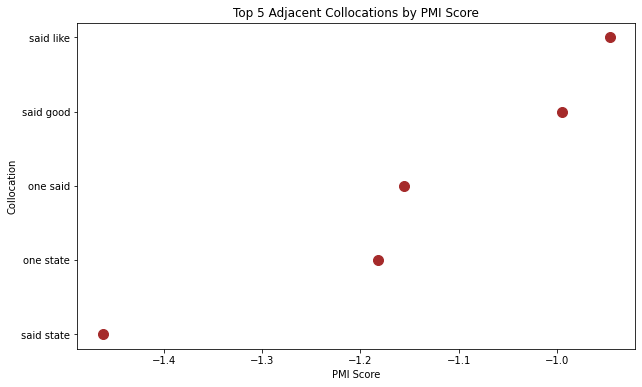

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data: Replace this with your top 5 collocations and their PMI scores
data = process_data_for_vis(good_collocations_adj)
plot_visualization(data, 'green')

data = process_data_for_vis(poor_collocations_adj)
plot_visualization(data, 'red')

data = process_data_for_vis(good_collocations_non_adj)
plot_visualization(data, 'blue')

data = process_data_for_vis(poor_collocations_non_adj)
plot_visualization(data, 'brown')

